# Analysis 1 : Champions' performance

In [1]:
import pandas as pd
import numpy as np
import json
from collections import Counter
import operator
from ast import literal_eval
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
%pylab inline
import httplib


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
data = pd.read_csv('./data/2002-2012-EPL.csv')

In [3]:
#Make a dictioary of the numbers of wins, losses, and draws for each team at each season.


team_W_L_D_dict = {}

for i in range(len(data)):
    
    team_W_L_D_dict.setdefault(data.season[i],{})
    team_W_L_D_dict[data.season[i]][data.home_team[i]] = {'W':0,'L':0,'D':0}

In [4]:
for i in range(len(data)):
    
    # going through the data, check if home_team scored more or less or equal to the away_team.
    
    if data.home_score[i] > data.away_score[i]:
        team_W_L_D_dict[data.season[i]][data.home_team[i]]['W'] += 1
        team_W_L_D_dict[data.season[i]][data.away_team[i]]['L'] += 1
        
        
        
    if data.home_score[i] < data.away_score[i]:
        team_W_L_D_dict[data.season[i]][data.home_team[i]]['L'] += 1
        team_W_L_D_dict[data.season[i]][data.away_team[i]]['W'] += 1
        
    if data.home_score[i] == data.away_score[i]:
        team_W_L_D_dict[data.season[i]][data.home_team[i]]['D'] += 1
        team_W_L_D_dict[data.season[i]][data.away_team[i]]['D'] += 1

In [40]:
# save the dictionary in a json format.

with open('./data/team_W_L_D_dict.json', 'w') as outfile:
    json.dump(team_W_L_D_dict, outfile)

In [11]:
# Save the result in a csv file.

team_W_L_D =  pd.DataFrame(columns = ['season','team','W','D','L'], 
                          index = np.arange(0,len(data.season.unique())*len(data.home_team.unique()),1))

c = 0

for i in sorted(team_W_L_D_dict.keys()):
    for j in team_W_L_D_dict[i]:
        team_W_L_D.season[c] = i
        team_W_L_D.team[c] = j
        team_W_L_D.W[c] = team_W_L_D_dict[i][j]['W']
        team_W_L_D.D[c] = team_W_L_D_dict[i][j]['D']
        team_W_L_D.L[c] = team_W_L_D_dict[i][j]['L']
        c+=1
        
team_W_L_D.to_csv('./data/season_team_W_L_D.csv')

In [12]:
team_W_L_D.head()

,season,team,W,D,L
0,2001-2002,Charlton Athletic,10,14,14
1,2001-2002,Southampton,12,9,17
2,2001-2002,Manchester United,24,5,9
3,2001-2002,Liverpool,24,8,6
4,2001-2002,Ipswich Town,9,9,20


In [14]:
# Using the dictionary above, we can compute the points each team collected. We also keep track of the 
# goal difference in case of any tie in the points, so we can rank the team correctly.

points = {}

for i in range(len(data)):
    
    points.setdefault(data.season[i],{})
    points[data.season[i]][data.home_team[i]] = {'pt':0,'dg':0}


for i in points:
    
    for j in points[i]:
        
        points[i][j]['pt'] = 3*(team_W_L_D_dict[i][j]['W']) + (team_W_L_D_dict[i][j]['D'])
        
        
        temp = data[data.season == i]

        temp1 = temp[temp.home_team == j]
        dif_goal1 = temp1.home_score.sum()-temp1.away_score.sum()
        
        temp2 = temp[temp.away_team == j]
        dif_goal2 = temp2.away_score.sum()-temp2.home_score.sum()
        
        dif_goal = dif_goal1+dif_goal2
        
        points[i][j]['dg'] = dif_goal
        

In [41]:
# save the dictionary in a json format.

with open('./data/points.json', 'w') as outfile:
    json.dump(points, outfile)

In [15]:
# save the result in a csv format.

season_team_point_difGoal =  pd.DataFrame(columns = ['season','team','pt','dg'], 
                          index = np.arange(0,len(data.season.unique())*len(data.home_team.unique()),1))

c = 0
for i in sorted(points.keys()):
    for j in points[i]:
        season_team_point_difGoal.season[c] = i
        season_team_point_difGoal.team[c] = j
        season_team_point_difGoal.pt[c] = points[i][j]['pt']
        season_team_point_difGoal.dg[c] = points[i][j]['dg']
        c+=1
        
season_team_point_difGoal.to_csv('./data/season_team_point_difGoal.csv')

In [16]:
season_team_point_difGoal.head()

,season,team,pt,dg
0,2001-2002,Charlton Athletic,44,-11
1,2001-2002,Southampton,45,-8
2,2001-2002,Manchester United,77,42
3,2001-2002,Liverpool,80,37
4,2001-2002,Ipswich Town,36,-23


In [18]:
# Now, we can find the ranking of teams in each season.

season_table = {}

for i in sorted(points.keys()):
          
    season_table.setdefault(i,[])

    temp = points[i]
    
    dicts = [{k: v} for (k,v) in temp.items()]
    dicts.sort(key=lambda d: (d.values()[0]['pt'], d.values()[0]['dg'],))
    
    season_table[i]=dicts

In [22]:
season_table

{'2001-2002': [{'Leicester City': {'dg': -34L, 'pt': 28}},
  {'Derby County': {'dg': -29L, 'pt': 30}},
  {'Ipswich Town': {'dg': -23L, 'pt': 36}},
  {'Sunderland': {'dg': -22L, 'pt': 40}},
  {'Bolton Wanderers': {'dg': -18L, 'pt': 40}},
  {'Everton': {'dg': -12L, 'pt': 43}},
  {'Charlton Athletic': {'dg': -11L, 'pt': 44}},
  {'Fulham': {'dg': -8L, 'pt': 44}},
  {'Middlesboro': {'dg': -12L, 'pt': 45}},
  {'Southampton': {'dg': -8L, 'pt': 45}},
  {'Blackburn Rovers': {'dg': 3L, 'pt': 46}},
  {'Tottenham Hotspur': {'dg': -4L, 'pt': 50}},
  {'Aston Villa': {'dg': -1L, 'pt': 50}},
  {'West Ham United': {'dg': -9L, 'pt': 53}},
  {'Chelsea': {'dg': 28L, 'pt': 64}},
  {'Leeds United': {'dg': 16L, 'pt': 66}},
  {'Newcastle United': {'dg': 22L, 'pt': 71}},
  {'Manchester United': {'dg': 42L, 'pt': 77}},
  {'Liverpool': {'dg': 37L, 'pt': 80}},
  {'Arsenal': {'dg': 43L, 'pt': 87}}],
 '2002-2003': [{'Sunderland': {'dg': -44L, 'pt': 19}},
  {'West Bromwich Albion': {'dg': -36L, 'pt': 26}},
  {'West 

In [39]:
# save the dictionary in a json format.

with open('./data/season_table.json', 'w') as outfile:
    json.dump(season_table, outfile)

In [31]:
# We extract the champion of each season.

season_champions = pd.DataFrame(columns = ['season','champion','win','draw','loss','points'], 
                          index = np.arange(0,len(data.season.unique()),1))

c = 0
for i in sorted(season_table.keys()):
    temp = season_table[i][-1]
    ch = temp.keys()[0]
    pt = temp[ch]['pt']
    season_champions.season[c] = i
    season_champions.champion[c] = ch
    season_champions.points[c] = pt
    season_champions.win[c] =  team_W_L_D_dict[i][ch]['W']
    season_champions.draw[c] = team_W_L_D_dict[i][ch]['D']
    season_champions.loss[c] = team_W_L_D_dict[i][ch]['L']
    c+=1
season_champions.to_csv('./data/season_champions.csv')

In [32]:
season_champions

,season,champion,win,draw,loss,points
0,2001-2002,Arsenal,26,9,3,87
1,2002-2003,Manchester United,25,8,5,83
2,2003-2004,Arsenal,26,12,0,90
3,2004-2005,Chelsea,29,8,1,95
4,2005-2006,Chelsea,29,4,5,91
5,2006-2007,Manchester United,28,5,5,89
6,2007-2008,Manchester United,27,6,5,87
7,2008-2009,Manchester United,28,6,4,90
8,2009-2010,Chelsea,27,5,6,86
9,2010-2011,Manchester United,23,11,4,80


In [4]:
season_champions = pd.read_csv('./data/season_champions.csv')

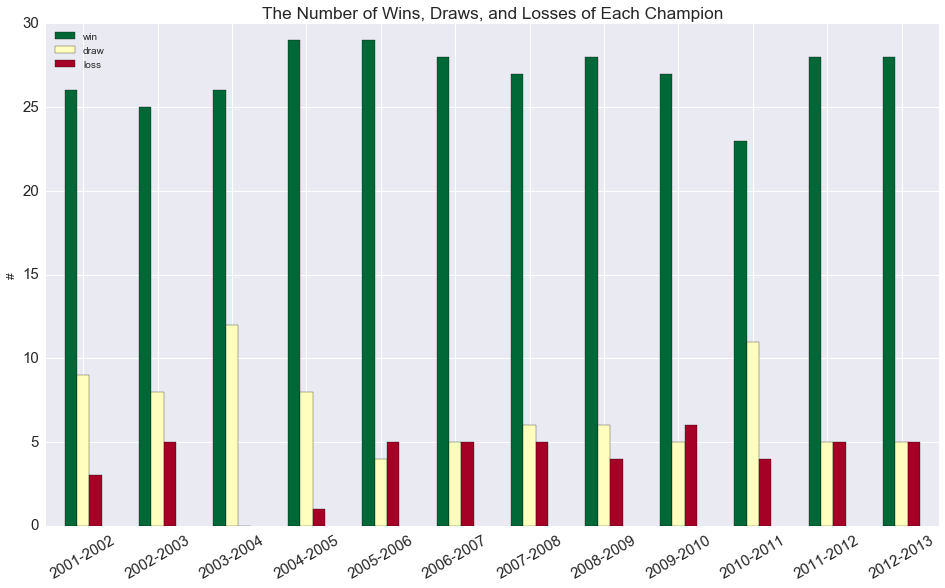

In [8]:
# plot the number of wins, losses and draws for each champion.


temp = season_champions[['season','champion','win','draw','loss']]

fig = plt.figure(figsize=(16,9))
ax = temp.plot(kind='bar', figsize=(16, 9), legend=True, fontsize=15,colormap ='RdYlGn_r')

ax.set_xticks(season_champions.index)
ax.set_xticklabels(season_champions.season, rotation=30)
ax.set_ylabel("#", size=12)
ax.set_title("The Number of Wins, Draws, and Losses of Each Champion",fontsize='xx-large')

savefig('The Number of Wins, Draws, and Losses of Each Champion.png')


C:\Users\milanlouei.s\AppData\Local\Continuum\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


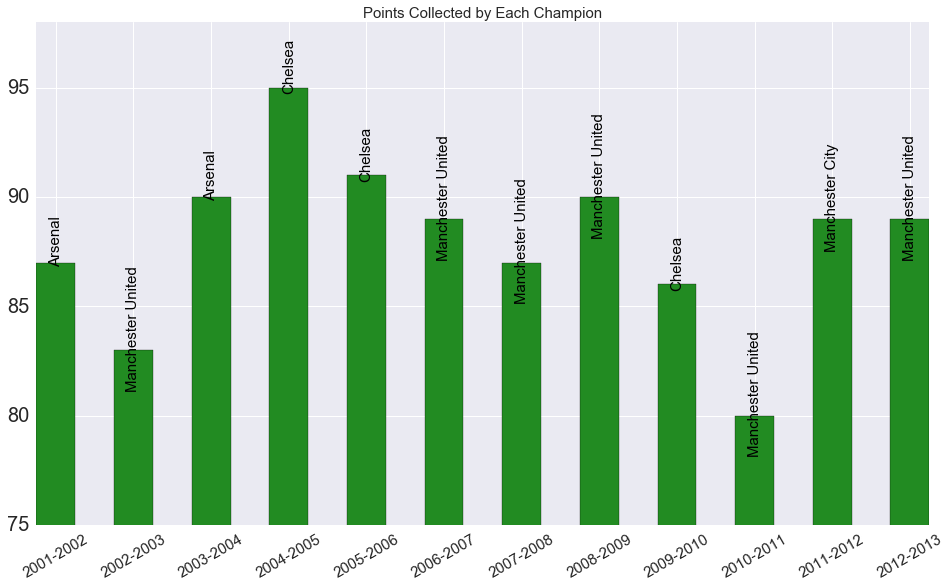

In [36]:
# plot the number of points each champion has collected.

temp = season_champions[['season','champion','points']]

plt.figure(figsize=(16,9))

c = 0

for i in range(len(temp)):
    
    plt.bar(c,temp.points[c],align="center", color = 'forestgreen', width=.5)
    plt.xticks(range(len(temp)),temp.season,rotation=30,ha='center',size = 15)
    plt.yticks(size = 20)
    plt.text(c, temp.points[c]+1, temp.champion[c], ha="center", va="center", rotation=90,size=15,color = 'black')
    c+=1

plt.title('Points Collected by Each Champion',size = 15)
plt.legend()
plt.ylim(75,98)
plt.grid(True)

savefig('Points Collected by Each Champion.png')